In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('/content/dermatology_database_1.csv')
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data = data.dropna()

X = data.drop(columns=['class'])
y = data['class']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


SVM Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.94      0.81        34
           2       0.48      0.89      0.63        18
           3       1.00      1.00      1.00        21
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        14
           6       0.56      0.83      0.67         6

    accuracy                           0.69       108
   macro avg       0.46      0.61      0.52       108
weighted avg       0.53      0.69      0.59       108

SVM Accuracy: 0.6851851851851852

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.97      1.00      0.99        34
           2       0.95      1.00      0.97        18
           3       1.00      1.00      1.00        21
           4       1.00      0.93      0.97        15
           5       1.00      1.00      1.00        14
           6       1.00      0.83 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
z_scores = np.abs(zscore(X))
threshold = 3
outlier_mask = (z_scores < threshold).all(axis=1)
X_cleaned = X[outlier_mask]
y_cleaned = y[outlier_mask]

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.3, random_state=42
)

svm_model_cleaned = SVC(random_state=42)
svm_model_cleaned.fit(X_train_cleaned, y_train_cleaned)
y_pred_svm_cleaned = svm_model_cleaned.predict(X_test_cleaned)

rf_model_cleaned = RandomForestClassifier(random_state=42)
rf_model_cleaned.fit(X_train_cleaned, y_train_cleaned)
y_pred_rf_cleaned = rf_model_cleaned.predict(X_test_cleaned)

print("SVM (Cleaned) Classification Report:")
print(classification_report(y_test_cleaned, y_pred_svm_cleaned))
print("SVM (Cleaned) Accuracy:", accuracy_score(y_test_cleaned, y_pred_svm_cleaned))

print("\nRandom Forest (Cleaned) Classification Report:")
print(classification_report(y_test_cleaned, y_pred_rf_cleaned))
print("Random Forest (Cleaned) Accuracy:", accuracy_score(y_test_cleaned, y_pred_rf_cleaned))


SVM (Cleaned) Classification Report:
              precision    recall  f1-score   support

           1       0.88      1.00      0.93        28
           2       0.25      0.89      0.39         9
           3       1.00      0.65      0.79        20
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         5

    accuracy                           0.64        77
   macro avg       0.42      0.51      0.42        77
weighted avg       0.61      0.64      0.59        77

SVM (Cleaned) Accuracy: 0.6363636363636364

Random Forest (Cleaned) Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       0.80      0.89      0.84         9
           3       1.00      1.00      1.00        20
           4       0.93      0.87      0.90        15
           5       1.00      1.00      1.00         5

    accuracy                           0.96        77
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


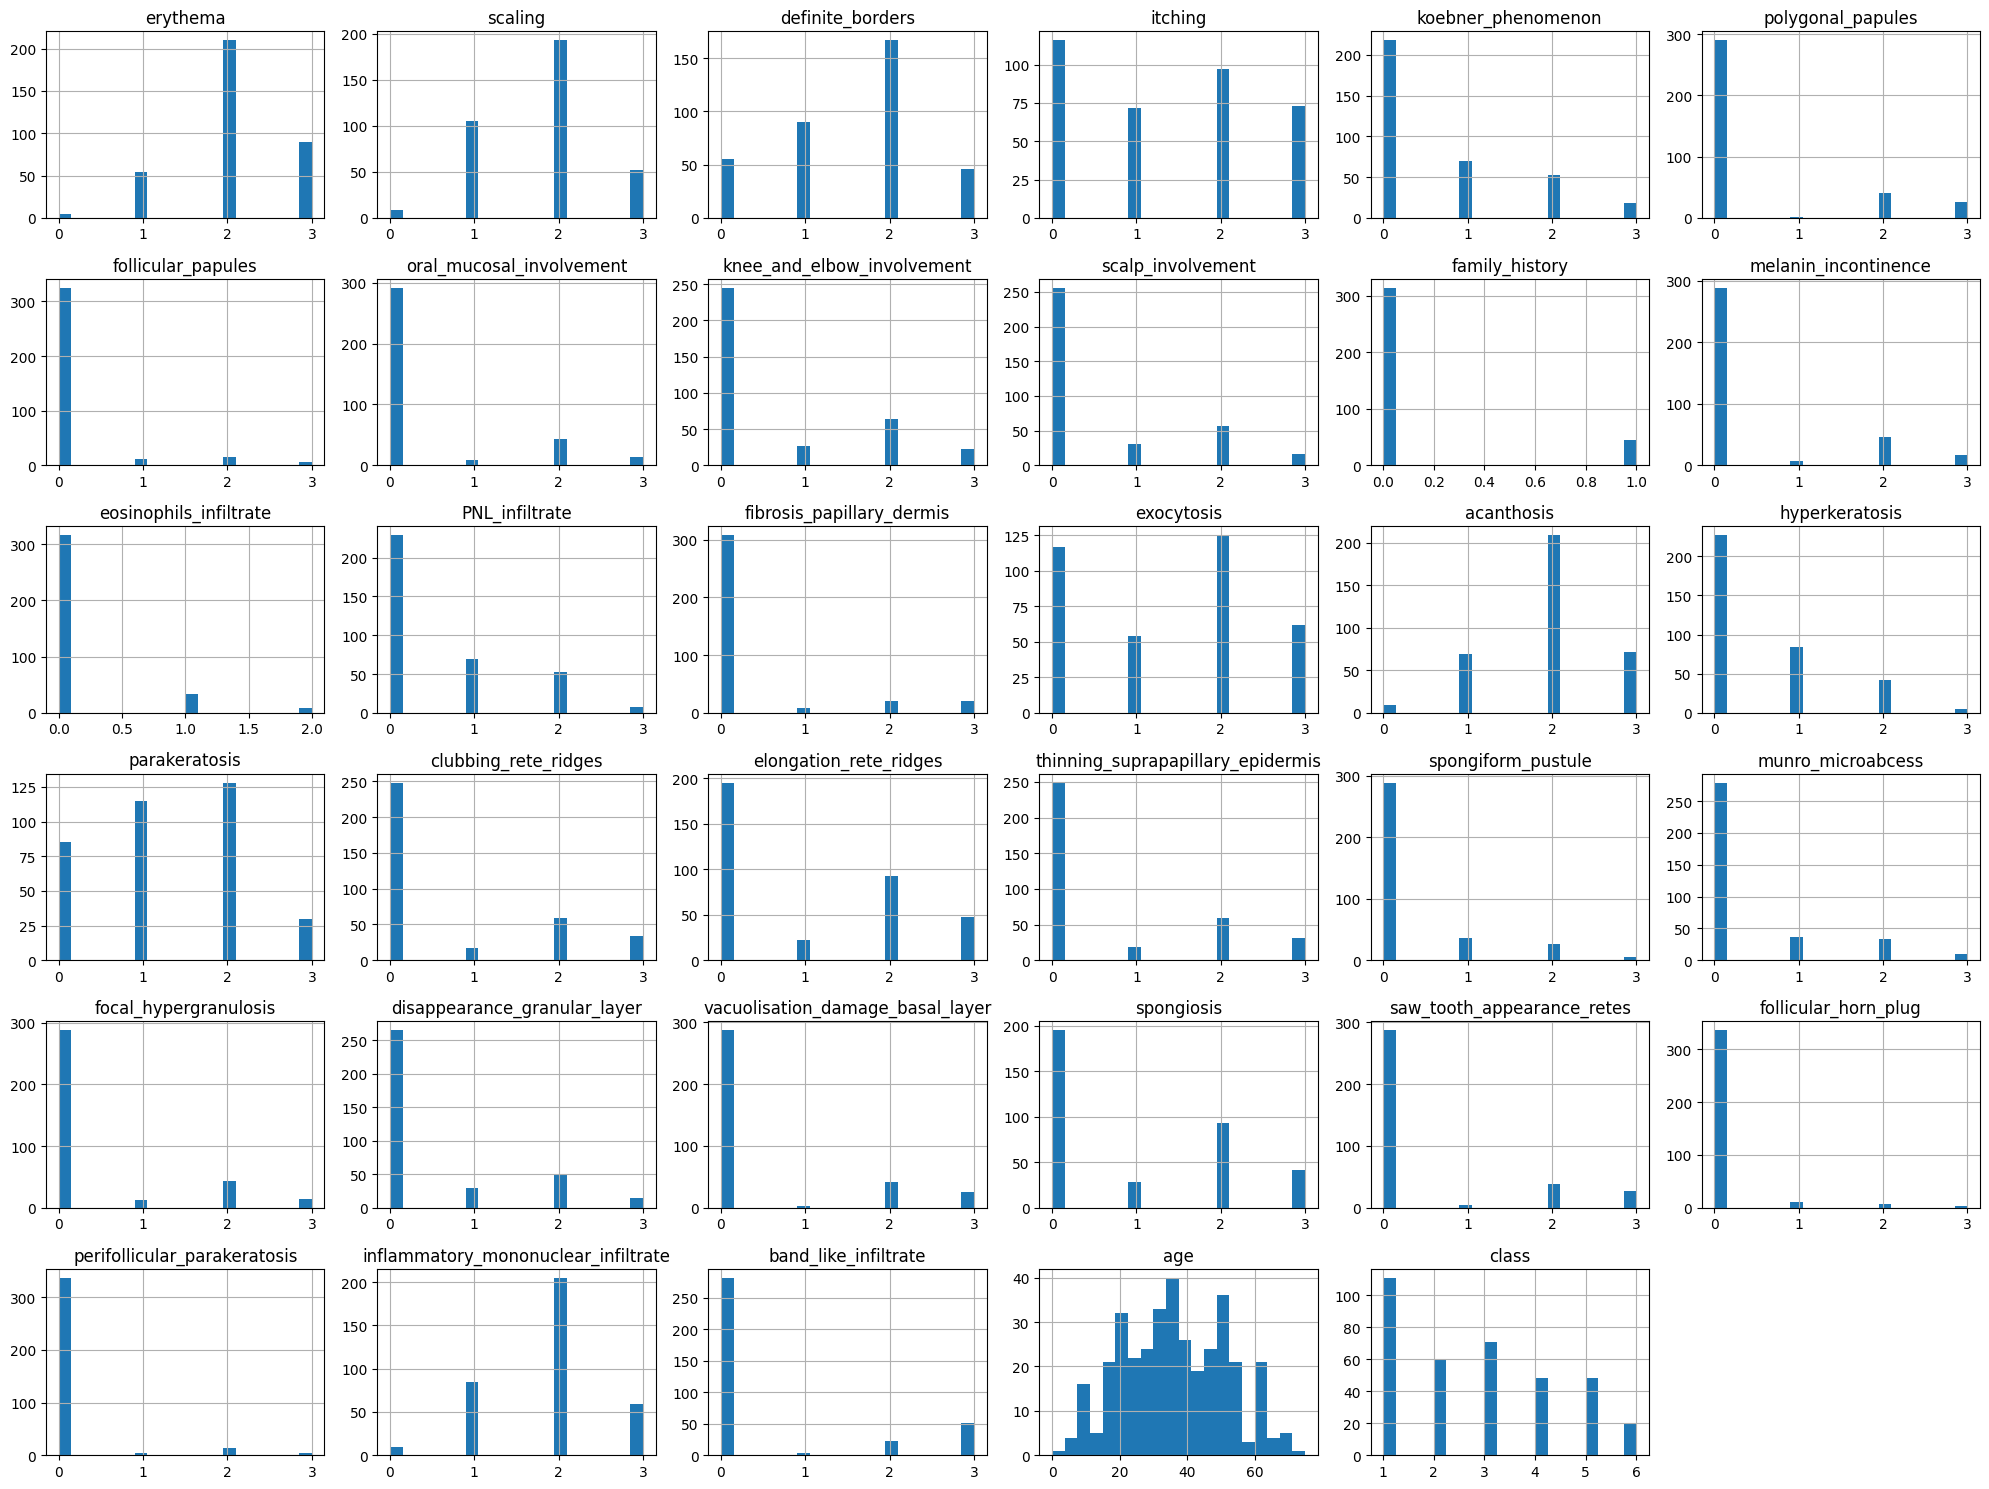

In [6]:
data.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()
